In [1]:
%pip install xarray[complete]
import xarray as xr

In [2]:
ds = xr.open_zarr("https://data.dynamical.org/noaa/gfs/analysis-hourly/latest.zarr?email=optional@email.com")
ds

<xarray.Dataset> Size: 1TB
Dimensions:                (latitude: 721, longitude: 1440, time: 82920)
Coordinates:
  * latitude               (latitude) float64 6kB 90.0 89.75 ... -89.75 -90.0
  * longitude              (longitude) float64 12kB -180.0 -179.8 ... 179.8
  * time                   (time) datetime64[ns] 663kB 2015-01-15 ... 2024-06...
Data variables:
    precipitation_surface  (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    temperature_2m         (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    wind_u_10m             (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
    wind_v_10m             (time, latitude, longitude) float32 344GB dask.array<chunksize=(160, 145, 144), meta=np.ndarray>
Attributes:
    attribution:         NOAA NCEP GFS data processed by dynamical.org from N...
    description:         Historical weather data from the Global Forecast Sys...
    id:                  noaa-gfs-analysis-hourly
    name:                NOAA GFS analysis, hourly
    spatial_domain:      Global
    spatial_resolution:  0.25 degrees (~20km)
    time_domain:         2015-01-15 00:00:00 UTC to 2024-07-01 00:00:00 UTC
    time_resolution:     1 hour

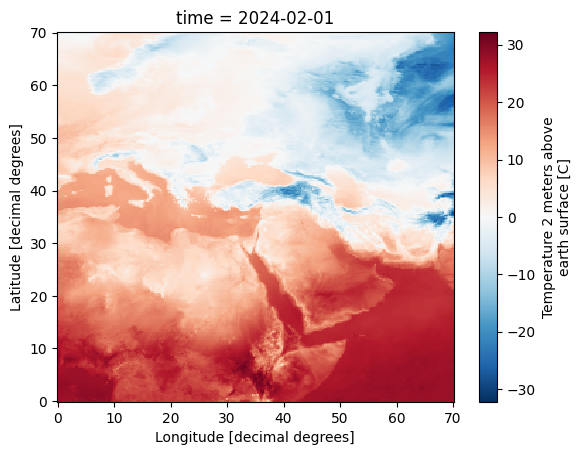

In [3]:
ds["temperature_2m"].sel(
    time="2024-02-01T00:00",
    latitude=slice(70, 0),
    longitude=slice(0, 70),
).plot()

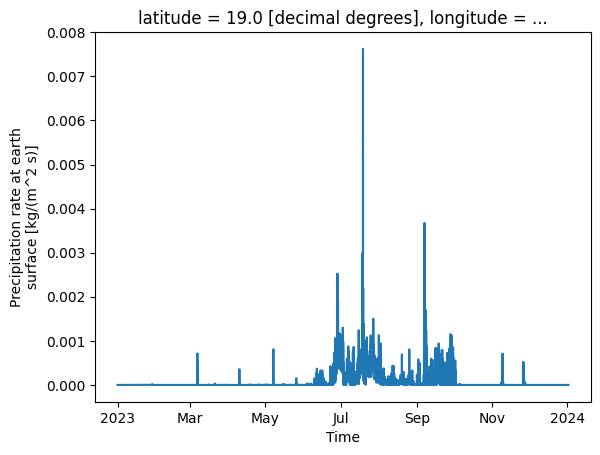

In [4]:
(
  ds["precipitation_surface"]
    .sel(latitude=19.1, longitude=72.9, method="nearest") # Mumbai, India
    .sel(time=slice("2023-01-01", "2024-01-01"))
    .plot()
)
# Can you spot monsoon season?

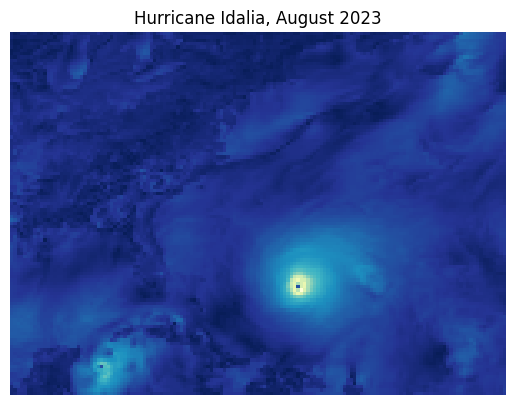

In [5]:
# Run this cell yourself to create an interactive animation
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np

wind_speed = (
    np.sqrt(ds["wind_u_10m"]**2 + ds["wind_v_10m"]**2)
    .sel(
        time=slice("2023-08-28T00", "2023-09-01"),
        latitude=slice(45, 18),
        longitude=slice(-92, -55)
    )
    .load()
)

fig, ax = plt.subplots()
ax.set_title("Hurricane Idalia, August 2023")
ax.axis("off")

img = ax.imshow(wind_speed.isel(time=0), cmap='YlGnBu_r')
anim = FuncAnimation(fig=fig, frames=wind_speed, func=lambda frame: img.set_data(frame), interval=60)

HTML(anim.to_jshtml())